In [1]:
!pip install cx_Oracle  #l’intégration du SGBD dans cet outil

cx_Oracle est un module d'extension Python qui permet à Python d'accéder à la base de données Oracle. Il est conforme à la spécification Python Database API v2.0

In [4]:
import cx_Oracle

Établir la connexion à la base de données

In [5]:
dsn_tns = cx_Oracle.makedsn('PC', '1521', service_name='XE') 
conn = cx_Oracle.connect(user='aya', password='aya', dsn=dsn_tns) 

command_handler = conn.cursor()


A cursor is an object which helps to execute the query and fetch the records from the database.

cree le tableau persons

In [8]:
try:
    command_handler.execute("CREATE TABLE persons( person_id NUMBER , first_name VARCHAR2(50) NOT NULL, last_name VARCHAR2(50) NOT NULL, moy NUMBER NOT NULL, PRIMARY KEY(person_id))")
except Exception as e:
    print("Could not create table")
    print(e)


In [7]:
command_handler.execute("DROP TABLE persons")

inserer un enregisterement dans le tableau persons 

In [9]:
try:
    command_handler.execute("insert into persons values ( 1 , 'aya', 'soualeh mohamed' , 18 )")
except Exception as e:
    print("Could not add a line")
    print(e)


inserer plusieur enregistrements a la fois dans le tableau persons 

In [10]:
query = "INSERT INTO persons VALUES (:1, :2, :3 , :4)"
query_vals = [
( 2 , "maissa","mati" , 18),
( 3 , "amina","mokdad" , 17),
( 4 , "maissa","boukaf" , 17)
]
command_handler.executemany(query,query_vals) 

afficher le contenu de tabeau persons 

In [11]:
command_handler.execute("SELECT * From persons")
while True:
                # fetch rows
                rows = command_handler.fetchmany()
                if not rows:
                    break
                # display rows
                for row in rows:
                    print(row)

(1, 'aya', 'soualeh mohamed', 18)
(2, 'maissa', 'mati', 18)
(3, 'amina', 'mokdad', 17)
(4, 'maissa', 'boukaf', 17)


In [22]:
#command_handler.execute("DELETE FROM persons WHERE person_id = 1")


In [12]:
command_handler.execute("SELECT last_name From persons")
while True:
                # fetch rows
                rows = command_handler.fetchmany()
                if not rows:
                    break
                # display rows
                for row in rows:
                    print(row)

('soualeh mohamed',)
('mati',)
('mokdad',)
('boukaf',)


l'affichage des donnees a l'aide de pandas 

In [30]:
import pandas as pd

In [31]:
# query Oracle using ora_conn and put the result into a pandas Dataframe
df_ora = pd.read_sql('select * from persons', con=conn)    
df_ora

,PERSON_ID,FIRST_NAME,LAST_NAME,MOY
0,1,aya,soualeh mohamed,18
1,2,maissa,mati,18
2,3,amina,mokdad,17
3,4,maissa,boukaf,17


In [11]:
df_ora = pd.read_sql('select * from persons where person_id=:myid', params={"myid":3}, con=conn) 
df_ora

,PERSON_ID,FIRST_NAME,LAST_NAME,MOY
0,3,amina,mokdad,17


 visualization 

In [33]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')

In [35]:
df_ora = pd.read_sql('select last_name "Name", moy "moyen" from persons', con=conn)    

conn.close()

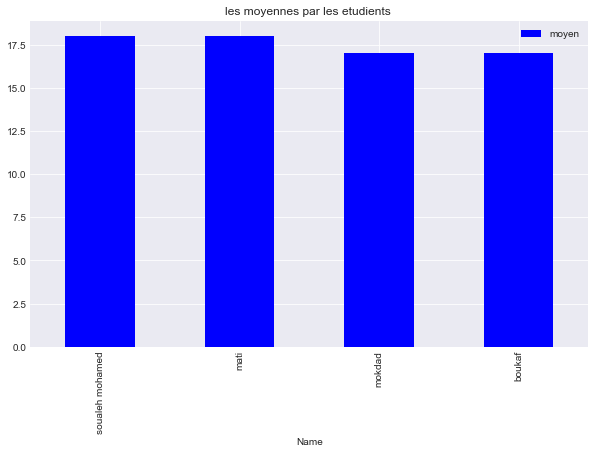

In [36]:
df_ora.plot(x='Name', y='moyen', title='les moyennes par les etudients ', figsize=(10, 6), kind='bar', color='blue');